In [1]:
# Importing Neccesary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Dataset
df = pd.read_csv('Ecommerce_Sales.csv')

In [3]:
# Dataset info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          1000 non-null   object 
 1   Order_Date        1000 non-null   object 
 2   Category          1000 non-null   object 
 3   Sub_Category      1000 non-null   object 
 4   Quantity          1000 non-null   int64  
 5   Price             1000 non-null   int64  
 6   Discount          1000 non-null   float64
 7   Revenue           1000 non-null   float64
 8   Profit            1000 non-null   float64
 9   Customer_Segment  1000 non-null   object 
 10  Region            1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


,Quantity,Price,Discount,Revenue,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.948000,2563.807000,0.151990,10713.297230,1582.552390
std,2.539241,1440.127035,0.087413,8917.402965,1510.271004
min,1.000000,102.000000,0.000000,129.220000,16.770000
25%,3.000000,1340.250000,0.080000,3565.357500,496.050000
50%,5.000000,2545.500000,0.160000,7960.980000,1123.420000
75%,7.000000,3861.000000,0.230000,15451.952500,2142.075000
max,9.000000,4997.000000,0.300000,43791.300000,9752.820000


In [4]:
# Checking null values
df.isnull().sum()


,0
Order_ID,0
Order_Date,0
Category,0
Sub_Category,0
Quantity,0
Price,0
Discount,0
Revenue,0
Profit,0
Customer_Segment,0


In [5]:
# Converting Order_Date column dtype to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'],format='%Y-%m-%d')

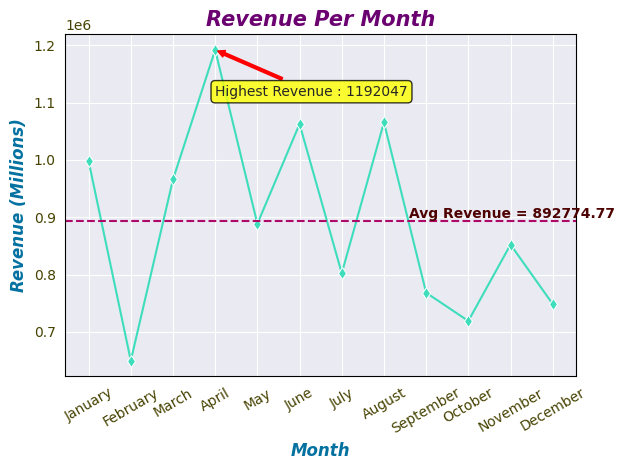

In [16]:
# Grouping by Order Month
Revenue = df.groupby(df['Order_Date'].dt.month)['Revenue'].sum().reset_index()

# Converting Month number into Month name
import calendar
Revenue['Order_Date'] = Revenue['Order_Date'].apply(lambda x : calendar.month_name[x])

# Page Theme
sns.set_style('darkgrid')

# Line Plot
ax = sns.lineplot(x='Order_Date',y='Revenue',data=Revenue,color='#3EDDBC',marker='d')
# Styling Title and axis labels
plt.title('Revenue Per Month',fontweight='bold',color='#6B0171',fontstyle='oblique',fontsize=15)
plt.xlabel('Month',color='#0371A0',fontsize=12,fontstyle='italic',fontweight='bold')
plt.ylabel('Revenue (Millions)',color='#0371A0',fontsize=12,fontstyle='italic',fontweight='bold')

# Annotation
x = Revenue['Revenue'].argmax()
month = Revenue.loc[x,'Order_Date']
reven = Revenue.loc[x,'Revenue']
plt.annotate(f'Highest Revenue : {round(reven)}',xy=(month,reven),xytext=(x,reven-80000),
             arrowprops=dict(color='red',arrowstyle='simple'),bbox=dict(facecolor='yellow',boxstyle='round',edgecolor='k',alpha=0.8))

# Mean Revenue
plt.axhline(Revenue['Revenue'].mean(),linestyle='--',color='#AE0969')
plt.text(x=len(Revenue['Order_Date'])-4.4,y=Revenue['Revenue'].mean(),s=f'Avg Revenue = {round(Revenue['Revenue'].mean(),2)}',fontsize=10,color='#4D0101',fontweight='bold',
        va='bottom')

# Borders
ax.spines['left'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['bottom'].set_color('k')

# Axis Ticks styling
plt.xticks(rotation=30)
ax.tick_params(axis='x',labelcolor='#464201')
ax.tick_params(axis='y',labelcolor='#464201')

# Page Layout
plt.tight_layout()
plt.show()

# Line Plot
# This line plot shows Sales revenue per month in 2023
# Highest Revenue in 4th Month = 1.1M , And Avg of 0.9M
# By Observing this plot we across that Sales perform better in first half of year than in second half
# Insights : 2nd Half of year is facing decline in sales
# This suggests a seasonal trend: sales drop in the latter half of the year

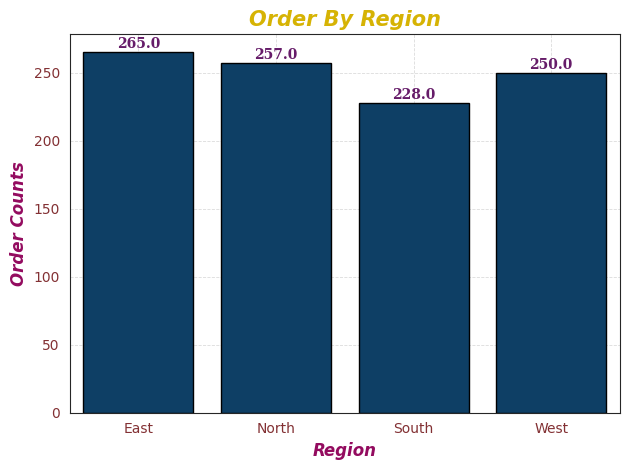

In [24]:
# Page Theme
sns.set_style('white')

# Grouping by Region
order = df.groupby('Region')['Order_ID'].count().reset_index()

# Bar plot
ax = sns.barplot(x='Region',y='Order_ID',data=order,edgecolor='k',color='#004173')

# Annotation
for i in ax.patches:
    length = i.get_height()
    plt.text(i.get_x()+i.get_width()/2,length+3,length,ha='center',fontweight='bold',fontfamily='Serif',color='#661C69')

# Styling Title and axis Labels
plt.title('Order By Region',fontsize=15,fontweight='bold',fontstyle='oblique',color='#D6B304')
plt.xlabel('Region',fontsize=12,fontweight='bold',fontstyle='italic',color='#930B5F')
plt.ylabel('Order Counts',fontsize=12,fontweight='bold',fontstyle='italic',color='#930B5F')

# Styling axis ticklabels
ax.tick_params(axis='x',labelcolor='#833134')
ax.tick_params(axis='y',labelcolor='#833134')

# Page layout
plt.grid(alpha=0.7,linewidth=0.6,linestyle='--')
plt.tight_layout()
plt.show()

# Bar Plot
# This Bar plot shows Number of Order is Each Region
# All regions show nearly equal order volumes, indicating uniform customer distribution across regions.

/tmp/ipython-input-308049771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Category',y='Profit',data=df,palette='Set1',showmeans=True,meanline=True,patch_artist=True,boxprops=


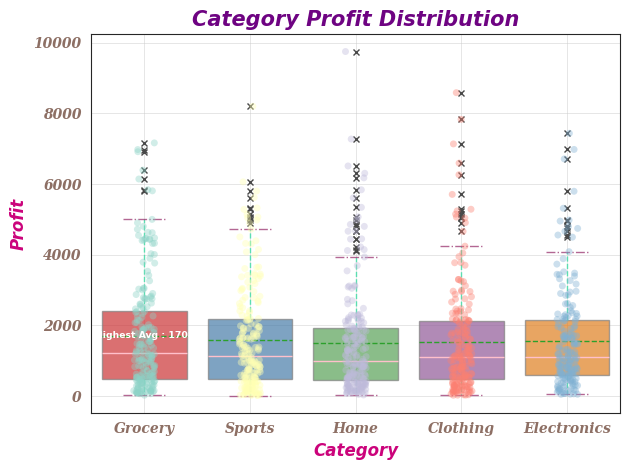

In [39]:
# Plotting boxplot and stripplot
ax = sns.boxplot(x='Category',y='Profit',data=df,palette='Set1',showmeans=True,meanline=True,patch_artist=True,boxprops=
            dict(edgecolor='grey',alpha=0.7),whiskerprops=dict(linestyle='--',color='#39DDA4',alpha=0.8),
           capprops=dict(linestyle='-.',color='#932666',alpha=0.7),
            flierprops=dict(marker='x',markersize=5)
           ,medianprops=dict(color='pink'))
sns.stripplot(x='Category',y='Profit',data=df,hue='Category',palette='Set3',edgecolor='k',alpha=0.4)

# Titles and label
plt.title('Category Profit Distribution',fontweight='bold',fontsize=15,color='#6E0382',fontstyle='oblique')
plt.xlabel('Category',fontweight='bold',fontsize=12,color='#CB037B',fontstyle='italic')
plt.ylabel('Profit',fontweight='bold',fontsize=12,color='#CB037B',fontstyle='italic')

# Annotating the highest Average Category
mn_val = df.groupby('Category',observed=False)['Profit'].mean().reset_index()
a = mn_val['Profit'].idxmax()
x = mn_val.loc[a,'Category']
y = mn_val.loc[a,'Profit']
plt.text(x=x,y=y,s=f'Highest Avg : {round(y)}',ha='center',va='center',size=6.7,fontweight='bold',color='w')

# Styling
ax.tick_params(axis='both',labelcolor='#8D6F64')
plt.xticks(fontweight='bold',fontstyle='oblique',fontfamily='Serif')
plt.yticks(fontweight='bold',fontstyle='oblique',fontfamily='Serif')

# Page Layout
plt.grid(alpha=0.5,linewidth=0.7)
plt.tight_layout()
plt.show()

# Boxplot + Stripplot
# Every category shows a wide spread of profit values with several outliers.
# Among all categories, Grocery exhibits the highest average profit.

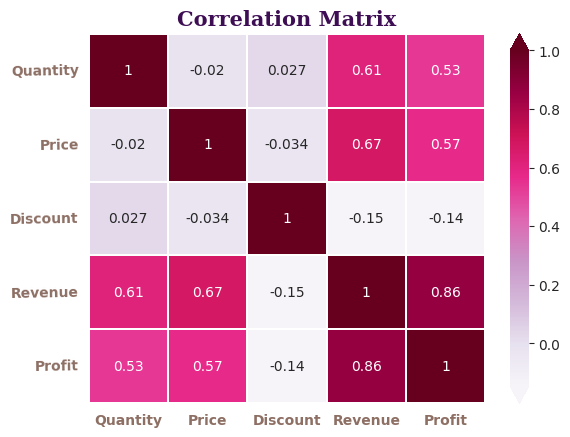

In [44]:
# Int and Float columns
ic = df.select_dtypes('int64').columns.tolist()
fc = df.select_dtypes('float64').columns.tolist()
columns = ic+fc
# correlation between columns
relation = df[columns].corr()

# correlation heatmap
c = {'shrink':1,'extend':'both'}
sns.heatmap(relation,annot=True,cmap='PuRd',linewidth=0.1,cbar_kws=c)

# Title
plt.title('Correlation Matrix',fontsize=15,fontweight='bold',fontfamily='Serif',color='#3E0E54')
plt.xticks(color='#8D6F64',fontweight='bold')
plt.yticks(color='#8D6F64',fontweight='bold',rotation=1)
plt.show()

# Correlation Heatmap
# Revenue has the highest correlation with other numeric features
# Discount shows minimal correlation, implying it does not directly drive numeric outcomes

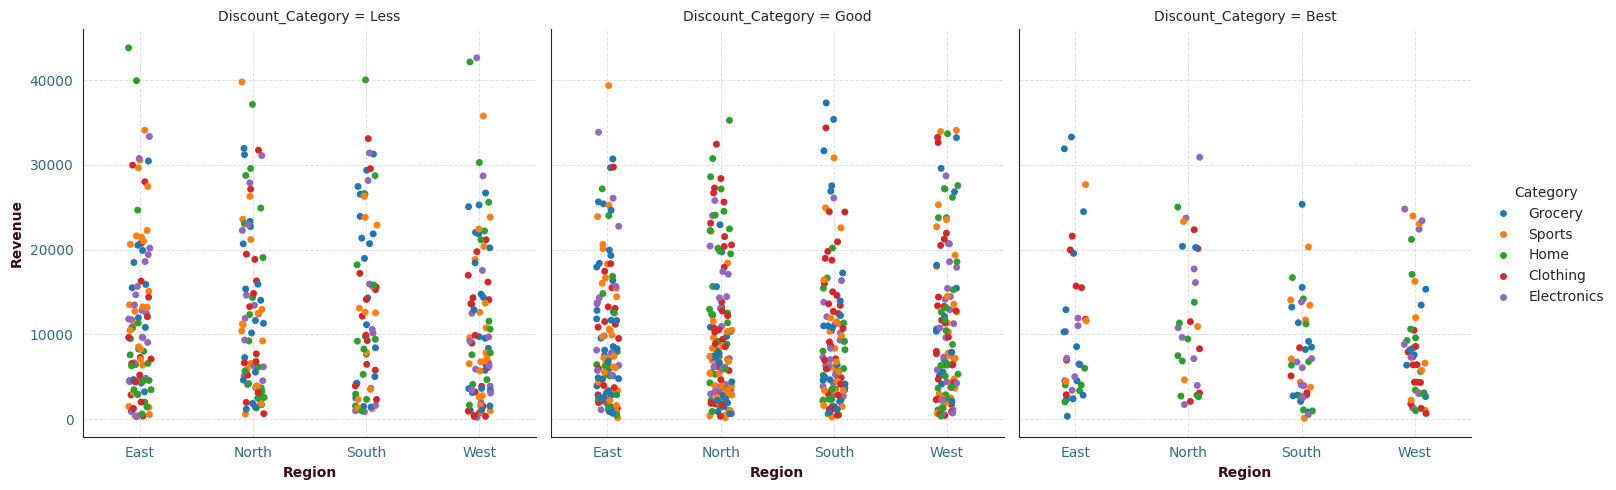

In [53]:
# Creating Column
b = [0.00,0.1,0.25,float('inf')]
l = ['Less','Good','Best']
df['Discount_Category'] = pd.cut(df['Discount'],bins=b,labels=l,include_lowest=True)

# Catplot
ax = sns.catplot(data=df,x='Region',y='Revenue',hue='Category',col='Discount_Category',sharex=True,sharey=True)

# Styling
for i in ax.axes.flat:
    i.set_xlabel('Region',fontweight='bold',color='#3B0B17')
    i.set_ylabel('Revenue',fontweight='bold',color='#3B0B17')
    i.grid(alpha=0.6,linewidth=0.7,linestyle='--')
    i.tick_params(axis='both',labelcolor='#2F6D86')

plt.show()

# pairplot
# Revenue is highest when discounts are moderate (0.10–0.25).
# Giving too little or too much discount both reduce revenue.
# This suggests customers respond best to mid-range discounts.

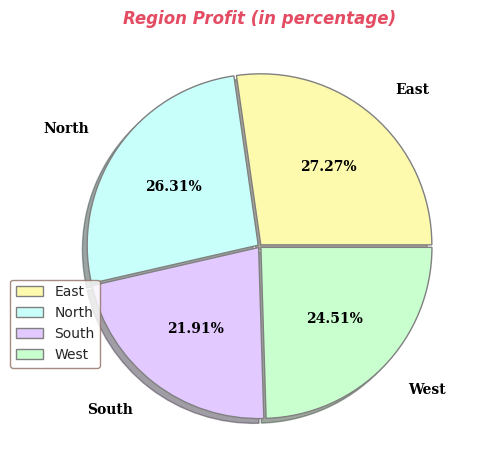

In [59]:
# Grouping by region
reg_profit = df.groupby('Region')['Profit'].sum().reset_index()

# Pie Chart
e = [0.01 for i in range(4)]
plt.pie(reg_profit['Profit'],autopct='%.02f%%',shadow=True,explode=e,colors=['#FDFAAD','#C9FFFA','#E2C9FF','#C9FFCF'],labeldistance=1.2,
       labels=reg_profit['Region'],wedgeprops=dict(edgecolor='grey'),textprops=dict(color='k',fontweight='bold',fontfamily='Serif'))

# Title and Legend
plt.title('Region Profit (in percentage)',fontweight='bold',fontstyle='oblique',color='#E44C63')
plt.legend(loc='lower left',bbox_to_anchor=(-0.10,0.2),edgecolor='#8D6F64')

# Page Layout
plt.tight_layout()
plt.show()

# Pie Chart
# In this chart we came to know Profit from each region
# East,North,West region are closely to a quater
# South contributes the least, indicating a potential for targeted marketing.

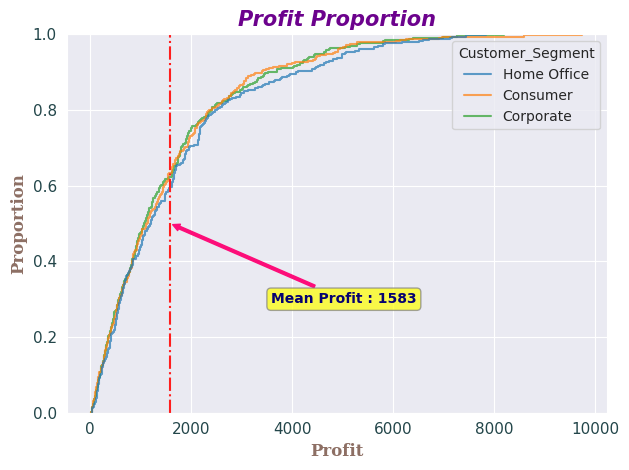

In [68]:
# Page Style
sns.set_style('darkgrid')

# ECDF plot
ax = sns.ecdfplot(x = 'Profit',hue='Customer_Segment',data=df,palette='tab10',alpha=0.7)

# Median Line
med = df['Profit'].mean()
plt.axvline(med,color='#FF1E1E',linestyle='-.')

# Annotation
plt.annotate(f'Mean Profit : {round(med)}',xy=(med,0.5),xytext=(med+2000,0.3),arrowprops=dict(color='#FD0D79',arrowstyle='simple'),
            bbox=dict(facecolor='yellow',boxstyle='round',edgecolor='grey',alpha=0.7),
            color='#060270',va='center',fontweight='bold',fontfamily='Cursive')

# Styling title and axis labels
plt.title('Profit Proportion',fontsize=15,fontweight='bold',fontstyle='oblique',color='#6C028D')
ax.set_xlabel('Profit',color='#8D6F64',fontweight='bold',fontsize=12,fontfamily='Serif')
ax.set_ylabel('Proportion',color='#8D6F64',fontweight='bold',fontsize=12,fontfamily='Serif')

# Ticks Styles
ax.tick_params(axis='both',labelcolor='#23464A',labelsize=11)

# Page layout
plt.tight_layout()
plt.show()

# ECDF plot : Empirical Cumulative Distribution Function
# 50% of all customers generate profit below ~1600, indicating a slightly right-skewed distribution.